<img src="Pics/PardeeCenterLogo_finalnew.png" />

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Data Info
Using the resulting dataset we cleaned and formatted in the session 2.3. We treat MilitarySpending as our dependent variable, TotalTrade and the rivalry indicator as two independent variables.<br>

DV: MilitarySpending- Continues variable <br>
IV1: TotalTrade- Continues variable <br>
IV2: AnyRivalry- Binary/dummy/dichotomous variable <br>

In [3]:
rival=pd.read_csv("Datasets/OLS long form.csv")
print(rival.shape)
rival.head()

(11928, 6)


,country,year,sumofrivalries,anyrivalry,MilitarySpending,TotalTrade
0,Afghanistan,1963.0,1.0,1.0,NaN,909.58270
1,Albania,1963.0,1.0,1.0,NaN,117.72906
2,Algeria,1963.0,1.0,1.0,NaN,9705.08790
3,Andorra,1963.0,0.0,0.0,NaN,0.00000
4,Antigua and Barbuda,1963.0,0.0,0.0,NaN,0.00000


# Data Cleaning

- column names
- extra columns
- missing values

In [4]:
# Use df.drop(columns=[column1, columns2, ...]) to remove extra columns
# Or slicing the data df_new=df[ [column1, column2, ...] ] to pass in desired columns
rival_ols=rival.drop(columns=["country","year","sumofrivalries"])
rival_ols=rival[["anyrivalry", "MilitarySpending","TotalTrade"]]
rival_ols.head()

,anyrivalry,MilitarySpending,TotalTrade
0,1.0,NaN,909.58270
1,1.0,NaN,117.72906
2,1.0,NaN,9705.08790
3,0.0,NaN,0.00000
4,0.0,NaN,0.00000


In [ ]:
rival_ols_changed=rival_ols.rename( columns= {"MilitarySpending":"TotalTrade"})

In [5]:
# Use df.rename( columns= {key:value}) where key represents the original column name, and value represents the desired column name
# Or make a bulk change
rival_ols.columns=["anyrival","milspend","totrade"]
rival_ols.head()

,anyrival,milspend,totrade
0,1.0,NaN,909.58270
1,1.0,NaN,117.72906
2,1.0,NaN,9705.08790
3,0.0,NaN,0.00000
4,0.0,NaN,0.00000


In [18]:
# Use df.isna() to check if any of the cells is empty
# Use df.dropna() to remove rows that have at least 1 empty cell
rival_ols.isna()
rival_ols.dropna()

,anyrival,milspend,totrade
5,1.0,2894.278800,15218.4570
6,0.0,4759.999500,35756.1840
7,0.0,1394.913200,13649.2460
11,0.0,3888.127900,53124.7500
15,1.0,56.327415,1105.8807
...,...,...,...
10379,0.0,1042.905600,18163.7230
10382,1.0,244.294770,39934.0080
10383,0.0,4650.309100,433003.3100
10386,0.0,272.694950,15632.4080


# Descriptive Statistics

- mean, median, standard deviation, number of obs
- Examine the distibution: histogram, boxplot, ...
- Data transformation: standardize, log transfrom, ...

In [9]:
rival_ols.describe()

,anyrival,milspend,totrade
count,6869.000000,6869.000000,6.869000e+03
mean,0.365701,8369.736298,1.028590e+05
std,0.481661,45985.101290,3.021580e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,88.630669,3.243768e+03
50%,0.000000,608.413570,1.274794e+04
75%,1.000000,3577.935500,6.228737e+04
max,1.000000,720220.000000,3.767269e+06


In [16]:
# log transformation for variables that have extreme values
rival_ols["totrade_log"]=np.log(1+rival_ols["totrade"])
rival_ols["milspend_log"]=np.log(1+rival_ols["milspend"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
rival_ols.head()

,anyrival,milspend,totrade,totrade_log,milspend_log
5,1.0,2894.278800,15218.4570,9.630330,7.970837
6,0.0,4759.999500,35756.1840,10.484506,8.468213
7,0.0,1394.913200,13649.2460,9.521513,7.241304
11,0.0,3888.127900,53124.7500,10.880417,8.265940
15,1.0,56.327415,1105.8807,7.009301,4.048779


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


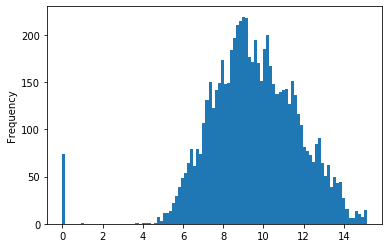

In [23]:
# log transformation for variables that have extreme values
rival_ols["totrade_log"]=np.log(1+rival_ols["totrade"])
rival_ols["milspend_log"]=np.log(1+rival_ols["milspend"])

# Histogram
rival_ols["totrade_log"].plot.hist(bins=100)

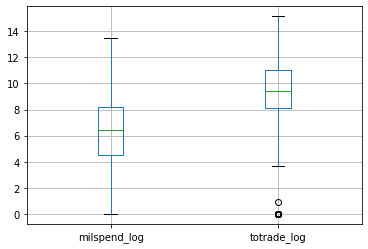

In [25]:
# Boxplot
rival_ols.boxplot(column=["milspend_log","totrade_log"])

# Pairwise Scatter Plot

In [27]:
import seaborn as sns

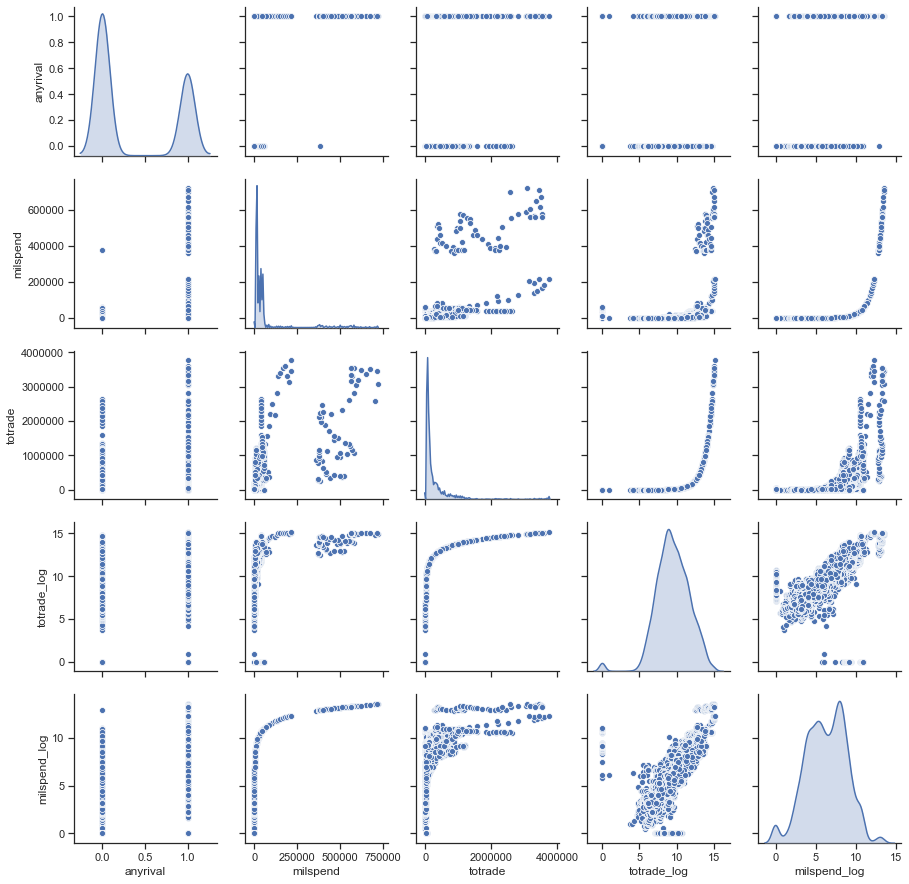

In [29]:
sns.set(style="ticks")
sns.pairplot(rival_ols,diag_kind = 'kde' ) # 

# Pearson Regression 

In [59]:
rival_ols.corr(method="pearson")

,anyrival,milspend,totrade,totrade_log,milspend_log
anyrival,1.000000,0.137644,0.051238,0.017901,0.210385
milspend,0.137644,1.000000,0.658460,0.275523,0.369881
totrade,0.051238,0.658460,1.000000,0.542076,0.492263
totrade_log,0.017901,0.275523,0.542076,1.000000,0.675621
milspend_log,0.210385,0.369881,0.492263,0.675621,1.000000


# OLS

Using R-style formula writing
https://www.statsmodels.org/dev/example_formulas.html

Conceptual model:

Natural Log of Total Trade = Intercept + $\beta$$_1$ * Natural Log of Military Speding + $\beta$$_2$ * Rival Indicator


In [30]:
model_ols=smf.ols("totrade_log ~ milspend_log+ C(anyrival)",data=rival_ols)

In [31]:
model_ols

In [32]:
model_ols=smf.ols("totrade_log ~ milspend_log+ C(anyrival)",data=rival_ols)
model_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totrade_log   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     3076.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:34:12   Log-Likelihood:                -13101.
No. Observations:                6869   AIC:                         2.621e+04
Df Residuals:                    6866   BIC:                         2.623e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.7199      0.054    105.900      0.000       5.614       5.826
C(anyrival)[T.1.0]    -0.6056      0.042    -14.500      0.000      -0.688      -0.524
milspend_log           0.6348      0.008     78.414      0.000       0.619       0.651
==============================================================================
Omnibus:                     5525.290   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197322.361
Skew:                          -3.608   Prob(JB):                         0.00
Kurtosis:                      28.246   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

In [66]:
import statsmodels.api as sm
model_logit = smf.glm("anyrival ~ totrade_log + milspend_log", data=rival_ols, family=sm.families.Binomial())
model_logit.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               anyrival   No. Observations:                 6869
Model:                            GLM   Df Residuals:                     6866
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4226.4
Date:                Fri, 21 Feb 2020   Deviance:                       8452.8
Time:                        14:20:12   Pearson chi2:                 8.98e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1160      0.138     -0.839      0.401      -0.387       0.155
totrade_log     -0.3264      0.024    -13.406      0.000      -0.374      -0.279
milspend_log     0.4166      0.022     19.052      0.000       0.374       0.459
================================================================================
"""